# ECE421 Assignment #3

In [274]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.colors import colorConverter

import numpy as np


1.  (2 points)  Implement a binary linear classifier on the first two dimensions (sepal lengthand width) of the iris dataset and plot its decision boundary.  (Hint:  sklearn refers tothe binary linear classifier as a LogisticRegression, we will see why later in the course.)

In [275]:
def plot_binary_classification(classifier, X, y, ax=None, alpha=1):
    markers = ('o', 'x')
    colors = ('r', 'b')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.array([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    for idx, cl in enumerate(np.unique(y)): 
       plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)

    # b = classifier.intercept_[0]
    # w1, w2 = classifier.coef_.T
    # c = -b/w2
    # m = -w1/w2
    # y_decision_b = m*X[:, 0] + c
    # ax.plot(X[:,0], y_decision_b, 'k', lw=1 )
    ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
            linestyles=['-'])
              
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


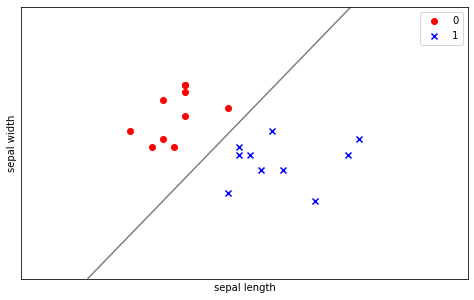

In [276]:
iris = load_iris()

# use frist 100 entries
x = iris['data'][:100, :2]
y = iris['target'][:100]

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.8, random_state=0)

logR_model = LogisticRegression(random_state=0)
logR_model.fit(trainX, trainY)

plt.figure(figsize=(8, 5))
plot_binary_classification(logR_model, trainX, trainY, alpha=0.2)
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

2.  (1 point)  Report the accuracy of your binary linear classifier on both the training andtest sets.

In [277]:
print('Accuracy on training dataset  = %.2f' % logR_model.score(trainX, trainY))
print('Accuracy on test dataset = %.2f' % logR_model.score(testX, testY))

Accuracy on training dataset  = 1.00
Accuracy on test dataset = 0.99


3.  (2 points)  Implement a linear SVM classifier on the first two dimensions (sepal lengthand width).  Plot the decision boundary of the classifier and its margins.

In [278]:
def plot_svm(classifier, X, y, ax=None, alpha=1):
    markers = ('o', 'x')
    colors = ('r', 'b','g')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.array([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    for idx, cl in enumerate(np.unique(y)): 
  
       plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)
    
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
    
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
              
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


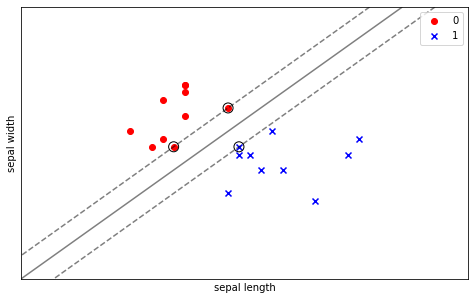

In [279]:
svm = SVC(kernel='linear', C=float('inf'))
svm.fit(trainX, trainY)

plt.figure(figsize=(8, 5))
plot_svm(svm, trainX, trainY, alpha=0.1)

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

4.  (1 point)  Circle the support vectors.  Please justify how to identify them through the duality theorem.  (hint:  KKT condition)

The support vectors are identified by solving dual problem induced from lagrangian equation. As of in this case if we are at the global optimum, according to KKT condition, strong duality holds, and they are also follows primal feasibility, dual feasibility, complemantary slackness, zero derivative. 

5.  (1 point)  Report the accuracy of your linear SVM classifier on both the training andtest sets.

In [280]:
print('Accuracy on training datatset = %.2f' % svm.score(trainX, trainY))
print('Accuracy on test dataset = %.2f' % svm.score(testX, testY))


Accuracy on training datatset = 1.00
Accuracy on test dataset = 1.00


6.  (1 point)  What is the value of the margin?  Justify your answer.

In [281]:
value_of_margin = 2*(1 / np.sqrt(np.sum(svm.coef_ ** 2)))
print('Value of margin = %.2f' % value_of_margin)

Value of margin = 0.42


As learnt from the class, for maximum margin hyperplane with no slack variable present, the value of margin equals to 2 times one over the norm of the weight vectors. (2/||w||)

7.  (1 point)  Which vector is orthogonal to the decision boundary?

The weight vectors w  is orthogonal to the decision boundary

In [282]:
weight_v = svm.coef_.T
print(weight_v)

[[ 3.33266363]
 [-3.33342658]]


8.  (3 points)  Split the iris dataset again in a training and test set, this time setting testsizeto 0.4 when calling traintestsplit.  Train the SVM classifier again.  Does the decisionboundary change?  How about the test accuracy?  Please justify why (hint:  think aboutthe support vectors), and illustrate your argument with a new plot.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


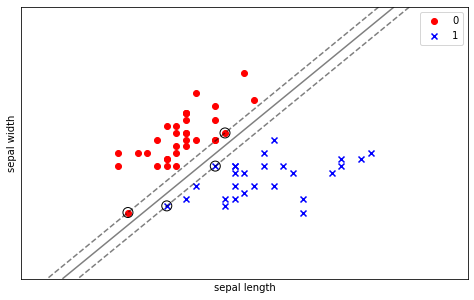

Accuracy on training datatset = 1.00
Accuracy on test dataset = 1.00
[[ 6.31804679]
 [-5.26503723]]


In [283]:
# iris = load_iris()

# # use frist 100 entries
# x = iris['data'][:100, :2]
# y = iris['target'][:100]

trainX_2, testX_2, trainY_2, testY_2 = train_test_split(x, y, test_size=0.4, random_state=0)

svm = SVC(kernel='linear', C=float('inf'))
svm.fit(trainX_2, trainY_2)

plt.figure(figsize=(8, 5))
plot_svm(svm, trainX_2, trainY_2, alpha=0.1)

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

print('Accuracy on training datatset = %.2f' % svm.score(trainX_2, trainY_2))
print('Accuracy on test dataset = %.2f' % svm.score(testX_2, testY_2))
weight_v = svm.coef_.T
print(weight_v)


As you could see from the example above the decision boundary has changed as we increase the number of training example. This is because more points where considered when deciding the margin boundary and as the results few points within the marginal boundary has changed the result of decision boundary.

9.  (1 point)  Do the binary linear classifier and SVM have the same decision boundaries?

In [284]:
b = logR_model.intercept_[0]
w1_l, w2_l = logR_model.coef_.T
print(w1_l, w2_l)

[1.80226162] [-1.24492959]


Linear classifier and svm has different decision boundaries

10.  (3 points)  Now consider all 150 entries in the iris dataset,  and retrain the SVM. Youshould find that the data points are not linearly separable.  How can you deal with it?Justify your answer and plot the decision boundary of your new proposed classifier.

In [288]:
def plot_svm_2(classifier, X, y, ax=None, alpha=1):
    markers = ('o', 'x', ',')
    colors = ('r', 'b','g', 'w')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.array([XX.ravel(), YY.ravel()]).T

    for idx, cl in enumerate(np.unique(y)): 
       plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], c=cmap(idx), marker=markers[idx], label=cl)
    
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
              
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


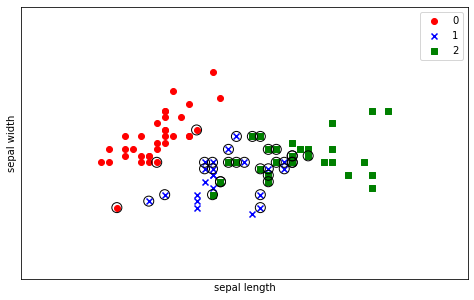

Accuracy on training datatset = 0.86
Accuracy on test dataset = 0.72


In [289]:
# iris = load_iris()

# # use frist 100 entries
x_new = iris['data'][:, :2]
y_new = iris['target']

trainX_3, testX_3, trainY_3, testY_3 = train_test_split(x_new, y_new, test_size=0.4, random_state=0)
svm = SVC(kernel='linear', C=10)
svm.fit(trainX_3, trainY_3)

plt.figure(figsize=(8, 5))
plot_svm_2(svm, trainX_3, trainY_3, alpha=0.1)

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

print('Accuracy on training datatset = %.2f' % svm.score(trainX_3, trainY_3))
print('Accuracy on test dataset = %.2f' % svm.score(testX_3, testY_3))


As we consider the full dataset, from graph above we could clearly see that data are not linearly seperable. However we could still seperate the data by allowing some slack variable. We could also adopt the idea of kernal to pick a landmark and find the nearest points.